# Amir Mohammad Ebrahiminasab - 610301101 - IRProject

---

## Step 1.

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('sample_data/MeQSum_ACL2019_BenAbacha_Demner-Fushman.xlsx')
# df = pd.read_excel('MeQSum_ACL2019_BenAbacha_Demner-Fushman.xlsx')

df.head()

,File,CHQ,Summary
0,1-131188152.xml.txt,SUBJECT: who and where to get cetirizine - D\n...,Who manufactures cetirizine?
1,14348.txt,who makes bromocriptine\ni am wondering what c...,Who manufactures bromocriptine?
2,1-131985747.xml.txt,SUBJECT: nulytely\nMESSAGE: Hello can you tell...,"Who makes nulytely, and where can I buy it?"
3,15410.txt,Williams' syndrome\nI would like to have my da...,Where can I get genetic testing for william's ...
4,35.txt,ClinicalTrials.gov - Question - general inform...,Where can I get genetic testing for multiple m...


In [3]:
df.shape

(1000, 3)

In [ ]:
df["CHQ"][1]

'who makes bromocriptine\ni am wondering what company makes the drug bromocriptine, i need it for a mass i have on my pituitary gland and the cost just keeps raising. i cannot ever buy a full prescription because of the price and i was told if i get a hold of the maker of the drug sometimes they offer coupons or something to help me afford the medicine. if i buy 10 pills in which i have to take 2 times a day it costs me 78.00. and that is how i have to buy them.  thanks.'

In [ ]:
df["Summary"][1]

'Who manufactures bromocriptine?'

As you can see above the we have three columns, the first one is essentially the file the text was from, the second column is the message user sent, and the third column is what the summarization of that message is.

## Step 2.

In [4]:
import re

I have a preprocess function which firstly removes HTML tags, then it removes non-alphanumeric characters then handles extra space and leading or trailing spaces and finally lowercases our text.

In [5]:
def preprocess(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    text = text.lower()

    return text

df['CHQ'] = df['CHQ'].apply(preprocess)
df['Summary'] = df['Summary'].apply(preprocess)

df.head()

,File,CHQ,Summary
0,1-131188152.xml.txt,subject who and where to get cetirizine d mess...,who manufactures cetirizine
1,14348.txt,who makes bromocriptine i am wondering what co...,who manufactures bromocriptine
2,1-131985747.xml.txt,subject nulytely message hello can you tell me...,who makes nulytely and where can i buy it
3,15410.txt,williams syndrome i would like to have my daug...,where can i get genetic testing for williams s...
4,35.txt,clinicaltrialsgov question general information...,where can i get genetic testing for multiple m...


As you can see below, our dataset is now much more clean and visible, (easy to understand).

In [ ]:
df["CHQ"][1]

'who makes bromocriptine i am wondering what company makes the drug bromocriptine i need it for a mass i have on my pituitary gland and the cost just keeps raising i cannot ever buy a full prescription because of the price and i was told if i get a hold of the maker of the drug sometimes they offer coupons or something to help me afford the medicine if i buy 10 pills in which i have to take 2 times a day it costs me 7800 and that is how i have to buy them thanks'

In [ ]:
df["Summary"][1]

'who manufactures bromocriptine'

## Step 3.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

As you can see below there is no Null values in the data set.

In [7]:
df["CHQ"].isnull().sum()

0

In [8]:
df["Summary"].isnull().sum()

0

Also there isn't any small texts so the dataset doesn't have any problem regarding missing values.

In [9]:
print(np.array([1 for text in df["CHQ"] if len(text) < 10]).sum())
print(np.array([1 for text in df["Summary"] if len(text) < 10]).sum())

0.0
0.0


Here we do some EDA so that we know the length of our texts and its outliers.

In [10]:
chq = np.array([len(text) for text in df['CHQ']])
summary = np.array([len(text) for text in df['Summary']])

print(f"chq mean leangth: {chq.mean()} and summary mean length: {summary.mean()} before handling outliers")

chq mean leangth: 328.102 and summary mean length: 61.081 before handling outliers


<ipython-input-11-3058e81e0ec0>:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([chq, summary], labels=['CHQ', 'Summary'])


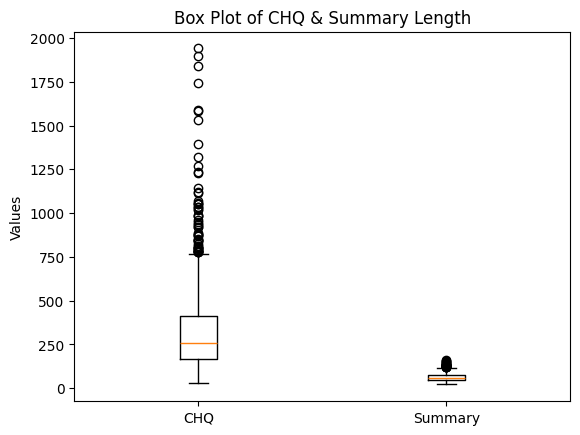

In [11]:
plt.boxplot([chq, summary], labels=['CHQ', 'Summary'])

plt.title('Box Plot of CHQ & Summary Length')
plt.ylabel('Values')
plt.show()

AS you can see above based on the boxplot we do have some outliers, and below we use IQR method to find the outliers and decide what length to choose for our padding and trucation.

Note that the IQR method, essentialy finds the interquartile range of the data, and then finds the middle of the range, and uses the difference between the middle and the upper and lower quartiles to find the length of the outliers.

### $$ IQR = Q_3 - Q_1 $$ ###

and then lower and upper bounds are:

### $$ LowerBound = Q_1 - 1.5 * IQR $$ ###

### $$ UpperBound = Q_3 + 1.5 * IQR $$ ###

and anything outside of these bounds is considered an outlier.

In [12]:
def find_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

lower_chq, upper_chq = find_outliers(chq)
lower_summary, upper_summary = find_outliers(summary)

print(lower_chq, upper_chq)
print(lower_summary, upper_summary)

-195.375 773.625
0.5 116.5


As you can see below, the length it makes sense for us is 300 for CHQ, and 60 for Summary. (Note that i did consider the lengths before handling outliers.)

In [13]:
chq = np.array([len(text) for text in df['CHQ'] if len(text) > lower_chq and len(text) < upper_chq])
summary = np.array([len(text) for text in df['Summary'] if len(text) > lower_summary and len(text) < upper_summary])

print(f"chq mean leangth: {round(chq.mean(), 2)} and summary mean length: {round(summary.mean(), 2)} after handling outliers!")

chq mean leangth: 285.51 and summary mean length: 59.16 after handling outliers!


Here we adjust our datasets based on the length, and you can see that the second CHQ has been truncated.

In [14]:
def adjust_text_length(text, length):
    if len(text) > length:
        return text[:length]
    else:
        return text.ljust(length)

df['CHQ'] = df['CHQ'].apply(lambda x: adjust_text_length(x, 300))
df['Summary'] = df['Summary'].apply(lambda x: adjust_text_length(x, 60))

df["CHQ"][1]

'who makes bromocriptine i am wondering what company makes the drug bromocriptine i need it for a mass i have on my pituitary gland and the cost just keeps raising i cannot ever buy a full prescription because of the price and i was told if i get a hold of the maker of the drug sometimes they offer c'

## Step 4

In [ ]:
!pip install transformers

In [ ]:
from transformers import MarianMTModel, MarianTokenizer
from tqdm import tqdm
import torch

In [ ]:
languages = {
    "es": "Helsinki-NLP/opus-mt-en-es", "de": "Helsinki-NLP/opus-mt-en-de", "it": "Helsinki-NLP/opus-mt-en-it",
    "zh": "Helsinki-NLP/opus-mt-en-zh",  "fr": "Helsinki-NLP/opus-mt-en-fr"
}

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

We preprocess the models below such that we can use all of them for the same data and get the translation we want.

In [ ]:
models_and_tokenizers = {
    lang: {
        "model": MarianMTModel.from_pretrained(model_name).to(device),
        "tokenizer": MarianTokenizer.from_pretrained(model_name)
    }
    for lang, model_name in languages.items()
}

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/298M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/768k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/797k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/343M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/789k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/814k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.35M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/806k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/805k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.62M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

One issue I had was that I had some problem with the speed of this process, so i searched  a bit and found that for better efficiency, you can use batches since the models support that and it decreases the overhead of the process.

What we do below is essentialy we first to tokenize the texts make trunc and padd them if necessary (which we did also ealier so it won't change much), make sure that is in the format the model needs(torch.tensor) and then we pass it to the model and get the output then decoded it using the tokenizer and we get the final output.

In [ ]:
def translate_texts(texts, lang, mx_len, all_model = models_and_tokenizers):
    model = all_model[lang]["model"]
    tokenizer = all_model[lang]["tokenizer"]

    tokenized_texts = tokenizer(texts, return_tensors="pt", truncation=True, padding=True, max_length=mx_len).to(device)
    translated = model.generate(**tokenized_texts)

    return [tokenizer.decode(t, skip_special_tokens=True) for t in translated]

batch_size = 16
for lang in tqdm(languages.keys()):
    df[f'CHQ_{lang}'] = (
        df['CHQ']
        .groupby(df.index // batch_size)
        .transform(lambda group: translate_texts(group.tolist(), lang, 300))
    )

100%|██████████| 5/5 [09:23<00:00, 112.70s/it]


Here you can see the translation of each record in all the languages needed.

In [ ]:
df.head()

,File,CHQ,Summary,CHQ_es,CHQ_de,CHQ_it,CHQ_zh,CHQ_fr
0,1-131188152.xml.txt,subject who and where to get cetirizine d mess...,who manufactures cetirizine ...,sujeto quién y dónde conseguir cetirizine d me...,"Thema, wer und wo Cetirizine d Nachricht zu be...",Oggetto chi e dove ottenere cetirizina d messa...,我需要知道谁在寻找新的供给 并且没有收到最新消息,sujet qui et où obtenir cetirizine d message j...
1,14348.txt,who makes bromocriptine i am wondering what co...,who manufactures bromocriptine ...,¿Quién hace bromocriptina Me pregunto qué comp...,"wer macht Bromocriptin Ich frage mich, welche ...",che fa bromocriptine sto chiedendo quale azien...,是谁制造了溴克里平ine 我想知道 是什么公司制造了这种药物 溴克里平丁(溴克里平ine) ...,qui fait de la bromocriptine je me demande que...
2,1-131985747.xml.txt,subject nulytely message hello can you tell me...,who makes nulytely and where can i buy it ...,asunto nulytely mensaje hola me puede decir dó...,Thema nulytely Nachricht Hallo können Sie mir ...,oggetto nulytely messaggio ciao puoi dirmi dov...,"请问,请告诉我,我在哪里 订购谁是制造谁的 细心谁是制造谁的 什么样的电话号码,我可以打电话谢谢。",sujet nulytely message bonjour pouvez-vous me ...
3,15410.txt,williams syndrome i would like to have my daug...,where can i get genetic testing for williams s...,síndrome de williams me gustaría que mi hija s...,Williams-Syndrom Ich möchte meine Tochter auf ...,sindrome di Williams vorrei che mia figlia tes...,威廉斯综合症 我想让我女儿接受 威廉斯综合症的测试 你能告诉我 我要去哪里 或者谁在我的地区...,Syndrome de Williams J'aimerais que ma fille s...
4,35.txt,clinicaltrialsgov question general information...,where can i get genetic testing for multiple m...,clinicaltrialsgov pregunta información general...,clinicaltrialsgov Frage allgemeine Information...,clinicaltrialsgov domanda informazioni general...,"我父母在70年代和母亲84岁时 与多位骨髓瘤父亲一起在Tx地点死亡,母亲在84岁。 肿瘤医生...",question générale mes parents sont morts dans ...


In [ ]:
df['CHQ'][1], df['CHQ_de'][1]

('who makes bromocriptine i am wondering what company makes the drug bromocriptine i need it for a mass i have on my pituitary gland and the cost just keeps raising i cannot ever buy a full prescription because of the price and i was told if i get a hold of the maker of the drug sometimes they offer c',
 'wer macht Bromocriptin Ich frage mich, welche Firma macht das Medikament Bromocriptin Ich brauche es für eine Masse, die ich auf meiner Hypophyse haben und die Kosten nur hält erhöhen ich kann nie kaufen ein volles Rezept wegen des Preises und ich wurde gesagt, wenn ich einen Halt des Herstellers des Medikaments bekommen manchmal bieten sie c')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


I saved the new csv in my google drive. The reason for this is that I had an issuse with gpu and computational power overall so i didn't want to run all these cells each time so I saved the progress I had in each step such that I can continue without the need to previous cells.

In [ ]:
df.to_csv('/content/drive/My Drive/edited_dataframe.csv', index=False)

### API

In [23]:
!pip install googletrans

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00


I searched a lot and the original translate google API needed credit card to use it. I found the google trans library which supposedly does the same thing but it's free!

In [44]:
import asyncio
import nest_asyncio
from googletrans import Translator
from tqdm import tqdm

nest_asyncio.apply()

async def google_trans_api(text, lang):
    async with Translator() as translator:
        result = await translator.translate(text, src='en', dest=lang)

        return result.text

In [40]:
langs = ["zh", "it", "fr", "de", "es"]

In [ ]:
ques = df["CHQ"].tolist()


for lang in tqdm(langs):
    trans = []
    for s in tqdm(ques):
        res = asyncio.get_event_loop().run_until_complete(google_trans_api(s, lang))
        trans.append(res)

    df[f"CHQ_{lang}"] = np.array(trans)

df.head()

 74%|███████▍  | 739/1000 [08:15<02:37,  1.66it/s]

You can see the google translated of records below for each language.

In [47]:
df.head()

,File,CHQ,Summary,CHQ_zh,CHQ_it,CHQ_fr,CHQ_de,CHQ_es
0,1-131188152.xml.txt,subject who and where to get cetirizine d mess...,who manufactures cetirizine ...,主题是谁以及从哪里获得cetirizine d消息，我需要知道谁制造了我的沃尔玛正在寻找新的...,soggetto chi e dove ricevere il messaggio di c...,Sujet qui et où obtenir le message de la cétir...,"Betreff, wer und woher muss Cetirizine D -Nach...",Sujeto quién y dónde recibir el mensaje Cetiri...
1,14348.txt,who makes bromocriptine i am wondering what co...,who manufactures bromocriptine ...,谁制作溴i的，我想知道什么公司使毒bromocriptine成为我需要的垂体，我需要它，而我...,Chi fa la bromocrittina mi chiedo quale compag...,"Qui fait de la bromocriptine, je me demande qu...","Wer Bromocriptin macht? Ich frage mich, welche...",¿Quién hace bromocriptina? Me pregunto qué com...
2,1-131985747.xml.txt,subject nulytely message hello can you tell me...,who makes nulytely and where can i buy it ...,主题不好的消息你好，你能告诉我我在哪里订购谁是谁，谁可以打电话给我什么电话号码，谢谢,"Oggetto NUOYTELY MESSAGGIO Ciao, puoi dirmi do...",Sujet Nulytely Message Hello pouvez-vous me di...,Betreff nulmentely meldung Hallo. Kannst du mi...,"Asunto Nulytely Mensaje Hola, ¿puede decirme d..."
3,15410.txt,williams syndrome i would like to have my daug...,where can i get genetic testing for williams s...,威廉姆斯综合症我想对女儿进行威廉姆斯综合症的测试,"Sindrome di Williams, vorrei farte testare mia...",Syndrome de Williams J'aimerais faire tester m...,"Williams Syndrom Ich möchte, dass meine Tochte...",Síndrome de Williams Me gustaría que mi hija s...
4,35.txt,clinicaltrialsgov question general information...,where can i get genetic testing for multiple m...,我的父母双方在TX中均在70年代的多个骨髓瘤父亲和84岁的母亲肿瘤学家建议我接受测试时，我不...,Clinicaltrialsgov Informazioni generali sia i ...,ClinicalTrialsgov Informations générales Mes p...,ClinicalTrialsgov Frage Allgemeine Information...,ClinicalTrialSgov Pregunta Información general...


In [46]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
df.to_csv('/content/drive/My Drive/edited_dataframe_api.csv', index=False)

Now here I translate them back to english using the same function and logic just changing the source and destination language.

In [49]:
nest_asyncio.apply()

async def google_trans_api(text, lang):
    async with Translator() as translator:
        result = await translator.translate(text, src=lang, dest='en')

        return result.text

In [ ]:
for lang in tqdm(langs):
    trans = []
    ques = df[f"CHQ_{lang}"].tolist()
    for s in tqdm(ques):
        res = asyncio.get_event_loop().run_until_complete(google_trans_api(s, lang))
        trans.append(res)

    df[f"CHQ_{lang}"] = np.array(trans)

df.head()

 96%|█████████▌| 961/1000 [09:09<00:08,  4.46it/s]

Here you can see the final result of the API approach.

In [51]:
df.head()

,File,CHQ,Summary,CHQ_zh,CHQ_it,CHQ_fr,CHQ_de,CHQ_es
0,1-131188152.xml.txt,subject who and where to get cetirizine d mess...,who manufactures cetirizine ...,Who is the subject and where to get the cetiri...,subject who and where to receive the message o...,Subject who and where to obtain the message fr...,"Subject, who and where does Cetirizine D messa...",Subject who and where to receive the message C...
1,14348.txt,who makes bromocriptine i am wondering what co...,who manufactures bromocriptine ...,"Who made bromoscriptine, I wonder what company...",Whoever makes bromocrit morning I wonder which...,"Who makes bromocriptine, I wonder which compan...",Who makes bromocriptin? I wonder which company...,Who does bromocriptine? I wonder what company ...
2,1-131985747.xml.txt,subject nulytely message hello can you tell me...,who makes nulytely and where can i buy it ...,"Hello news about bad topics, can you tell me w...","Subject new message hello, you can tell me whe...",Subject nonytyly message hello can you tell me...,Post Nulmentely message Hello. Can you tell me...,"NulyTely Master Subject, can you tell me where..."
3,15410.txt,williams syndrome i would like to have my daug...,where can i get genetic testing for williams s...,Williams Syndrome I want to test my daughter f...,"Williams syndrome, I would like to make my dau...",Williams syndrome I would like to have my daug...,Williams syndrome I want my daughter to test f...,Williams Syndrome I would like my daughter to ...
4,35.txt,clinicaltrialsgov question general information...,where can i get genetic testing for multiple m...,My parents both in TX were in multiple myeloma...,Clinicalrialsgov general information and my pa...,Clinicals Gov General Information My parents d...,Clinicaltrialsgov Question General information...,Clinicaltrials Gov asks general information bo...


In [52]:
df.to_csv('/content/drive/My Drive/edited_dataframe_api.csv', index=False)

## Step 5

In this step we just reverse our models so that we have the english translation of each of those columns!

In [ ]:
reverse_languages = {
    "es": "Helsinki-NLP/opus-mt-es-en",
    "de": "Helsinki-NLP/opus-mt-de-en",
    "it": "Helsinki-NLP/opus-mt-it-en",
    "zh": "Helsinki-NLP/opus-mt-zh-en",
    "fr": "Helsinki-NLP/opus-mt-fr-en"
}

In [ ]:
reverse_models_and_tokenizers = {
    lang: {
        "model": MarianMTModel.from_pretrained(model_name).to(device),
        "tokenizer": MarianTokenizer.from_pretrained(model_name)
    }
    for lang, model_name in reverse_languages.items()
}

config.json:   0%|          | 0.00/1.44k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/298M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/797k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/768k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/344M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/814k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/790k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.37M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/805k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/807k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.62M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

Same logic just reversed models!

In [ ]:
for lang in tqdm(reverse_languages.keys()):
    df[f'CHQ_{lang}'] = (
            df[f'CHQ_{lang}']
            .groupby(df.index // batch_size)
            .transform(lambda group: translate_texts(group.tolist(), lang, 300, reverse_models_and_tokenizers))
        )

    df[f'CHQ_{lang}'] = df[f'CHQ_{lang}'].apply(preprocess)

100%|██████████| 5/5 [10:35<00:00, 127.00s/it]


In [ ]:
df.head()

,File,CHQ,Summary,CHQ_es,CHQ_de,CHQ_it,CHQ_zh,CHQ_fr
0,1-131188152.xml.txt,subject who and where to get cetirizine d mess...,who manufactures cetirizine ...,subject who and where to get cetirizine d mess...,subject who and where cetirizine to get the me...,object who and where to get message cetiordina...,i need to know whos looking for new supplies a...,topic who and where to get thisirizine message...
1,14348.txt,who makes bromocriptine i am wondering what co...,who manufactures bromocriptine ...,who makes bromocriptine i wonder what company ...,who makes bromocriptin i wonder which company ...,that does bromocriptine im wondering which com...,i want to know what company made this drug bro...,who makes bromocriptine i wonder what society ...
2,1-131985747.xml.txt,subject nulytely message hello can you tell me...,who makes nulytely and where can i buy it ...,nulytely issue message hello can tell me where...,subject nulytely message hello can you tell me...,object nulytely message hello you can tell me ...,excuse me please tell me where im ordering who...,subject voidely message hello can you tell me ...
3,15410.txt,williams syndrome i would like to have my daug...,where can i get genetic testing for williams s...,williams syndrome i would like my daughter to ...,williams syndrome i want my daughter tested fo...,williams syndrome i would like my daughter tes...,williams syndrome i want my daughter tested fo...,williams syndrome id like my daughter to be te...
4,35.txt,clinicaltrialsgov question general information...,where can i get genetic testing for multiple m...,clinicaltrialsgov asks general information bot...,clinicaltrialsgov question general information...,clinicaltrialsgov demands general information ...,my parents died at tx in the 1970s and at the ...,general question my parents died in location t...


In [ ]:
print(df['CHQ'][1])
print(df['CHQ_de'][1])
print(df['CHQ_it'][1])
print(df['CHQ_zh'][1])
print(df['CHQ_fr'][1])
print(df['CHQ_es'][1])

who makes bromocriptine i am wondering what company makes the drug bromocriptine i need it for a mass i have on my pituitary gland and the cost just keeps raising i cannot ever buy a full prescription because of the price and i was told if i get a hold of the maker of the drug sometimes they offer c
who makes bromocriptin i wonder which company makes the drug bromocriptin i need it for a mass that i have on my pituitary and only keeps increasing the cost i can never buy a full prescription because of the price and i was told if i get a hold of the manufacturer of the drug sometimes offer it c
that does bromocriptine im wondering which company makes the bromocriptine drug i need it for a mass that i have on my pituitary gland and the cost continues to grow i can never buy a full prescription because of the price and i was told if i get a grip of the drug manufacturer sometimes offer c
i want to know what company made this drug bropripine and i need it to do a mass im in my hypothermia
w

In [ ]:
df.to_csv('/content/drive/My Drive/edited_dataframe.csv', index=False)

## Step 6

In [ ]:
df = pd.read_csv("/kaggle/input/dataset/edited_dataframe.csv")
df.head()

,File,CHQ,Summary,CHQ_es,CHQ_de,CHQ_it,CHQ_zh,CHQ_fr,FQD_score_es,FQD_score_it,...,FQD_scores_es,FQD_scores_it,FQD_scores_fr,FQD_scores_de,FQD_scores_zh,PRQD_scores_it,PRQD_scores_fr,PRQD_scores_de,PRQD_scores_zh,PRQD_scores_es
0,1-131188152.xml.txt,subject who and where to get cetirizine d mess...,who manufactures cetirizine ...,subject who and where to get cetirizine d mess...,subject who and where cetirizine to get the me...,object who and where to get message cetiordina...,i need to know whos looking for new supplies a...,topic who and where to get thisirizine message...,0.198753,0.222724,...,0.130650,0.146386,0.181880,0.191137,0.252733,0.591921,0.531989,0.521420,0.445204,0.642823
1,14348.txt,who makes bromocriptine i am wondering what co...,who manufactures bromocriptine ...,who makes bromocriptine i wonder what company ...,who makes bromocriptin i wonder which company ...,that does bromocriptine im wondering which com...,i want to know what company made this drug bro...,who makes bromocriptine i wonder what society ...,0.024132,0.027861,...,0.016016,0.018464,0.013655,0.011165,0.079532,0.840499,0.836552,0.858895,0.636893,0.886367
2,1-131985747.xml.txt,subject nulytely message hello can you tell me...,who makes nulytely and where can i buy it ...,nulytely issue message hello can tell me where...,subject nulytely message hello can you tell me...,object nulytely message hello you can tell me ...,excuse me please tell me where im ordering who...,subject voidely message hello can you tell me ...,0.316679,0.341263,...,0.208065,0.224204,0.211772,0.200915,0.234523,0.546443,0.580439,0.591012,0.550349,0.582324
3,15410.txt,williams syndrome i would like to have my daug...,where can i get genetic testing for williams s...,williams syndrome i would like my daughter to ...,williams syndrome i want my daughter tested fo...,williams syndrome i would like my daughter tes...,williams syndrome i want my daughter tested fo...,williams syndrome id like my daughter to be te...,0.529431,0.536492,...,0.347731,0.352366,0.384871,0.313656,0.347764,0.310886,0.257100,0.372723,0.306414,0.318716
4,35.txt,clinicaltrialsgov question general information...,where can i get genetic testing for multiple m...,clinicaltrialsgov asks general information bot...,clinicaltrialsgov question general information...,clinicaltrialsgov demands general information ...,my parents died at tx in the 1970s and at the ...,general question my parents died in location t...,0.012951,0.151706,...,0.008676,0.099765,0.064742,0.040738,0.347738,0.650558,0.767976,0.840981,0.340978,0.913610


Here we use the Bart model for getting the embeddings of the text.

In [ ]:
from transformers import BartTokenizer, BartModel

model_name = "facebook/bart-large"
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartModel.from_pretrained(model_name)
model.to(device)
model.eval()

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

BartModel(
  (shared): BartScaledWordEmbedding(50265, 1024, padding_idx=1)
  (encoder): BartEncoder(
    (embed_tokens): BartScaledWordEmbedding(50265, 1024, padding_idx=1)
    (embed_positions): BartLearnedPositionalEmbedding(1026, 1024)
    (layers): ModuleList(
      (0-11): 12 x BartEncoderLayer(
        (self_attn): BartSdpaAttention(
          (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
          (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
          (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
          (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
        )
        (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (activation_fn): GELUActivation()
        (fc1): Linear(in_features=1024, out_features=4096, bias=True)
        (fc2): Linear(in_features=4096, out_features=1024, bias=True)
        (final_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=

The calculate_pair_FQD function does the 1 - cosine similarity which was suggested in the description of this task!

Then we normalize the values using min max, note that since in the cosine similarity we essentially have the normalized values already!

the embeding function gets the enitre data, batches them and gives them to the bart model and returns its embeding in a format of a list!

In [ ]:
def calculate_pair_FQD(Q1, Q2):
    return 1 - np.dot(Q1, Q2) / (np.linalg.norm(Q1) * np.linalg.norm(Q2))

def normalize(x, min, max):
    return (x - min) / (max - min)

def embeding(texts, batch_size=16):
    embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]

        inputs = tokenizer(
            batch_texts,
            return_tensors="pt",
            padding='max_length',
            truncation=True,
            max_length=512
        )
        inputs = {k: v.to(device) for k, v in inputs.items()}

        with torch.no_grad():
            outputs = model(**inputs)
            batch_embeddings = outputs.last_hidden_state.mean(dim=1).cpu().numpy()
        embeddings.append(batch_embeddings)

    return np.concatenate(embeddings, axis=0)

In [ ]:
columns = ["CHQ", "CHQ_es", "CHQ_it", "CHQ_fr", "CHQ_de", "CHQ_zh"]

In [ ]:
embd_ls = []

for text_col in tqdm(columns):
    texts = df[text_col].tolist()
    embeddings = embeding(texts, batch_size=16)
    embd_ls.append(np.array(list(embeddings)))

100%|██████████| 6/6 [06:06<00:00, 61.06s/it]


In [ ]:
len(embd_ls[0])

1000

The fill function, calculates the FQD score of each record and fills the dataframe (hence the name!)

In [ ]:
def fill(idx):
    embd = embd_ls[idx]
    og_embd = embd_ls[0]
    ans = []
    for i in range(len(og_embd)):
        ans.append(calculate_pair_FQD(og_embd[i], embd[i]))

    df[f"FQD_scores_{columns[idx].split('_')[-1]}"] = np.array(ans)

for idx in range(1, len(columns)):
    fill(idx)

In [ ]:
df.head()

,File,CHQ,Summary,CHQ_es,CHQ_de,CHQ_it,CHQ_zh,CHQ_fr,FQD_score_es,FQD_score_it,FQD_score_fr,FQD_score_de,FQD_score_zh,FQD_scores_es,FQD_scores_it,FQD_scores_fr,FQD_scores_de,FQD_scores_zh
0,1-131188152.xml.txt,subject who and where to get cetirizine d mess...,who manufactures cetirizine ...,subject who and where to get cetirizine d mess...,subject who and where cetirizine to get the me...,object who and where to get message cetiordina...,i need to know whos looking for new supplies a...,topic who and where to get thisirizine message...,0.198753,0.222724,0.276792,0.290892,0.384722,0.130650,0.146386,0.181880,0.191137,0.252733
1,14348.txt,who makes bromocriptine i am wondering what co...,who manufactures bromocriptine ...,who makes bromocriptine i wonder what company ...,who makes bromocriptin i wonder which company ...,that does bromocriptine im wondering which com...,i want to know what company made this drug bro...,who makes bromocriptine i wonder what society ...,0.024132,0.027861,0.020536,0.016743,0.120886,0.016016,0.018464,0.013655,0.011165,0.079532
2,1-131985747.xml.txt,subject nulytely message hello can you tell me...,who makes nulytely and where can i buy it ...,nulytely issue message hello can tell me where...,subject nulytely message hello can you tell me...,object nulytely message hello you can tell me ...,excuse me please tell me where im ordering who...,subject voidely message hello can you tell me ...,0.316679,0.341263,0.322325,0.305788,0.356983,0.208065,0.224204,0.211772,0.200915,0.234523
3,15410.txt,williams syndrome i would like to have my daug...,where can i get genetic testing for williams s...,williams syndrome i would like my daughter to ...,williams syndrome i want my daughter tested fo...,williams syndrome i would like my daughter tes...,williams syndrome i want my daughter tested fo...,williams syndrome id like my daughter to be te...,0.529431,0.536492,0.586006,0.477525,0.529482,0.347731,0.352366,0.384871,0.313656,0.347764
4,35.txt,clinicaltrialsgov question general information...,where can i get genetic testing for multiple m...,clinicaltrialsgov asks general information bot...,clinicaltrialsgov question general information...,clinicaltrialsgov demands general information ...,my parents died at tx in the 1970s and at the ...,general question my parents died in location t...,0.012951,0.151706,0.098357,0.061792,0.529441,0.008676,0.099765,0.064742,0.040738,0.347738


Here we perform min-max. (which is not necessary since it's 1 - cosine similarity)

In [ ]:
min_fqd = min(df[['FQD_score_es', 'FQD_score_it', 'FQD_score_fr', 'FQD_score_de', 'FQD_score_zh']].min())
max_fqd = max(df[['FQD_score_es', 'FQD_score_it', 'FQD_score_fr', 'FQD_score_de', 'FQD_score_zh']].max())

df['FQD_score_es'] = df['FQD_score_es'].apply(lambda x: normalize(x, min_fqd, max_fqd))
df['FQD_score_it'] = df['FQD_score_it'].apply(lambda x: normalize(x, min_fqd, max_fqd))
df['FQD_score_fr'] = df['FQD_score_fr'].apply(lambda x: normalize(x, min_fqd, max_fqd))
df['FQD_score_de'] = df['FQD_score_de'].apply(lambda x: normalize(x, min_fqd, max_fqd))
df['FQD_score_zh'] = df['FQD_score_zh'].apply(lambda x: normalize(x, min_fqd, max_fqd))

In [ ]:
df.head()

,File,CHQ,Summary,CHQ_es,CHQ_de,CHQ_it,CHQ_zh,CHQ_fr,FQD_score_es,FQD_score_it,FQD_score_fr,FQD_score_de,FQD_score_zh,FQD_scores_es,FQD_scores_it,FQD_scores_fr,FQD_scores_de,FQD_scores_zh
0,1-131188152.xml.txt,subject who and where to get cetirizine d mess...,who manufactures cetirizine ...,subject who and where to get cetirizine d mess...,subject who and where cetirizine to get the me...,object who and where to get message cetiordina...,i need to know whos looking for new supplies a...,topic who and where to get thisirizine message...,0.198753,0.222724,0.276792,0.290892,0.384722,0.130650,0.146386,0.181880,0.191137,0.252733
1,14348.txt,who makes bromocriptine i am wondering what co...,who manufactures bromocriptine ...,who makes bromocriptine i wonder what company ...,who makes bromocriptin i wonder which company ...,that does bromocriptine im wondering which com...,i want to know what company made this drug bro...,who makes bromocriptine i wonder what society ...,0.024132,0.027861,0.020536,0.016743,0.120886,0.016016,0.018464,0.013655,0.011165,0.079532
2,1-131985747.xml.txt,subject nulytely message hello can you tell me...,who makes nulytely and where can i buy it ...,nulytely issue message hello can tell me where...,subject nulytely message hello can you tell me...,object nulytely message hello you can tell me ...,excuse me please tell me where im ordering who...,subject voidely message hello can you tell me ...,0.316679,0.341263,0.322325,0.305788,0.356983,0.208065,0.224204,0.211772,0.200915,0.234523
3,15410.txt,williams syndrome i would like to have my daug...,where can i get genetic testing for williams s...,williams syndrome i would like my daughter to ...,williams syndrome i want my daughter tested fo...,williams syndrome i would like my daughter tes...,williams syndrome i want my daughter tested fo...,williams syndrome id like my daughter to be te...,0.529431,0.536492,0.586006,0.477525,0.529482,0.347731,0.352366,0.384871,0.313656,0.347764
4,35.txt,clinicaltrialsgov question general information...,where can i get genetic testing for multiple m...,clinicaltrialsgov asks general information bot...,clinicaltrialsgov question general information...,clinicaltrialsgov demands general information ...,my parents died at tx in the 1970s and at the ...,general question my parents died in location t...,0.012951,0.151706,0.098357,0.061792,0.529441,0.008676,0.099765,0.064742,0.040738,0.347738


And finally here we select those with the desired scores. (Here is each score that lies between 0.3 and 0.7)

In [ ]:
columns = ['FQD_score_es', 'FQD_score_it', 'FQD_score_fr', 'FQD_score_de', 'FQD_score_zh']

df_fqd = df[['CHQ', 'Summary']].copy()

for col in columns:
    suffix = col.split('_')[-1]
    filter_df = df.loc[(df[col] > 0.3) & (df[col] < 0.7), [f"CHQ_{suffix}", "Summary"]]
    filter_df.rename(columns={f"CHQ_{suffix}": 'CHQ'}, inplace=True)
    df_fqd = pd.concat([df_fqd, filter_df], ignore_index=True, axis=0)

df_fqd

,CHQ,Summary
0,subject who and where to get cetirizine d mess...,who manufactures cetirizine ...
1,who makes bromocriptine i am wondering what co...,who manufactures bromocriptine ...
2,subject nulytely message hello can you tell me...,who makes nulytely and where can i buy it ...
3,williams syndrome i would like to have my daug...,where can i get genetic testing for williams s...
4,clinicaltrialsgov question general information...,where can i get genetic testing for multiple m...
...,...,...
2253,i want to see three doctors today but theyre a...,how to treat chest pain potentially associated...
2254,content content information spleen information...,what are the ingredients of periomed 63 fluori...
2255,any skin cream that has a positive effect on s...,what are the best creams for skin cancer ...
2256,short airholes dizziness heat short asthma sho...,what are the symptoms of asthma ...


Note that we assume the original data is ok, so we add those that fit the score to them such that we have better dataset to use on the model.

In [ ]:
df.to_csv('/content/drive/My Drive/edited_dataframe.csv', index=False)

In [ ]:
df_fqd.to_csv('/content/drive/My Drive/edited_dataframe_fqd.csv', index=False)

## Step 7

In [ ]:
df = pd.read_csv('/content/drive/My Drive/edited_dataframe.csv')

df.head()

,File,CHQ,Summary,CHQ_es,CHQ_de,CHQ_it,CHQ_zh,CHQ_fr,FQD_score_es,FQD_score_it,FQD_score_fr,FQD_score_de,FQD_score_zh,FQD_scores_es,FQD_scores_it,FQD_scores_fr,FQD_scores_de,FQD_scores_zh
0,1-131188152.xml.txt,subject who and where to get cetirizine d mess...,who manufactures cetirizine ...,subject who and where to get cetirizine d mess...,subject who and where cetirizine to get the me...,object who and where to get message cetiordina...,i need to know whos looking for new supplies a...,topic who and where to get thisirizine message...,0.198753,0.222724,0.276792,0.290892,0.384722,0.130650,0.146386,0.181880,0.191137,0.252733
1,14348.txt,who makes bromocriptine i am wondering what co...,who manufactures bromocriptine ...,who makes bromocriptine i wonder what company ...,who makes bromocriptin i wonder which company ...,that does bromocriptine im wondering which com...,i want to know what company made this drug bro...,who makes bromocriptine i wonder what society ...,0.024132,0.027861,0.020536,0.016743,0.120886,0.016016,0.018464,0.013655,0.011165,0.079532
2,1-131985747.xml.txt,subject nulytely message hello can you tell me...,who makes nulytely and where can i buy it ...,nulytely issue message hello can tell me where...,subject nulytely message hello can you tell me...,object nulytely message hello you can tell me ...,excuse me please tell me where im ordering who...,subject voidely message hello can you tell me ...,0.316679,0.341263,0.322325,0.305788,0.356983,0.208065,0.224204,0.211772,0.200915,0.234523
3,15410.txt,williams syndrome i would like to have my daug...,where can i get genetic testing for williams s...,williams syndrome i would like my daughter to ...,williams syndrome i want my daughter tested fo...,williams syndrome i would like my daughter tes...,williams syndrome i want my daughter tested fo...,williams syndrome id like my daughter to be te...,0.529431,0.536492,0.586006,0.477525,0.529482,0.347731,0.352366,0.384871,0.313656,0.347764
4,35.txt,clinicaltrialsgov question general information...,where can i get genetic testing for multiple m...,clinicaltrialsgov asks general information bot...,clinicaltrialsgov question general information...,clinicaltrialsgov demands general information ...,my parents died at tx in the 1970s and at the ...,general question my parents died in location t...,0.012951,0.151706,0.098357,0.061792,0.529441,0.008676,0.099765,0.064742,0.040738,0.347738


Here we use the prqd method, we define 4 functions:

    1. prec: which is the precision with the following formula:
#### $$ \sum_{v \in V} min(\alpha h_Q(v), \hat{h}_{Q}(v)) $$ ####

    2. rec: which is the recall with the following formula:
#### $$ \sum_{v \in V} min(h_Q(v), \frac{\hat{h}_Q(v)}{\alpha}) $$ ####

    3. f1: which is the f1 score with the following formula:
#### $$ 2 \cdot \frac{prec(\alpha) \cdot rec(\alpha)}{prec(\alpha) + rec(\alpha)} $$ ####

    4. prqd_function: which returns the prqd score between two texts that are embedded in the same vector space with the following formula:
#### $$ max(f1(\alpha)) $$ ####

for every $\alpha$ in the range of $ [0, \frac{7 \pi}{4}] $.


In [ ]:
def prec(Q1, Q2, alpha):
    return np.sum(np.minimum(alpha*Q1, Q2))

def rec(Q1, Q2, alpha):
    return np.sum(np.minimum(Q1, Q2/alpha))

def f1(Q1, Q2, alpha):
    precision = prec(Q1, Q2, alpha)
    recall = rec(Q1, Q2, alpha)

    return 2 * precision * recall / (precision + recall)

def PRQD_score(Q1, Q2):
    alphas = np.array([0.00000001, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4])

    return max([f1(Q1, Q2, alpha) for alpha in alphas])

In [ ]:
columns = ["CHQ", "CHQ_es", "CHQ_it", "CHQ_fr", "CHQ_de", "CHQ_zh"]

Here we fill the dataframe with the prqd scores.

In [ ]:
def fill_pr(idx):
    embd = embd_ls[idx]
    og_embd = embd_ls[0]
    ans = []
    for i in range(len(og_embd)):
        ans.append(PRQD_score(og_embd[i], embd[i]))

    df[f"PRQD_scores_{columns[idx].split('_')[-1]}"] = np.array(ans)

for idx in range(1, len(columns)):
    fill_pr(idx)

In [ ]:
df.head()

,File,CHQ,Summary,CHQ_es,CHQ_de,CHQ_it,CHQ_zh,CHQ_fr,FQD_score_es,FQD_score_it,...,FQD_scores_es,FQD_scores_it,FQD_scores_fr,FQD_scores_de,FQD_scores_zh,PRQD_scores_it,PRQD_scores_fr,PRQD_scores_de,PRQD_scores_zh,PRQD_scores_es
0,1-131188152.xml.txt,subject who and where to get cetirizine d mess...,who manufactures cetirizine ...,subject who and where to get cetirizine d mess...,subject who and where cetirizine to get the me...,object who and where to get message cetiordina...,i need to know whos looking for new supplies a...,topic who and where to get thisirizine message...,0.198753,0.222724,...,0.130650,0.146386,0.181880,0.191137,0.252733,-250.719080,-266.120346,-268.836327,-288.422200,-237.638295
1,14348.txt,who makes bromocriptine i am wondering what co...,who manufactures bromocriptine ...,who makes bromocriptine i wonder what company ...,who makes bromocriptin i wonder which company ...,that does bromocriptine im wondering which com...,i want to know what company made this drug bro...,who makes bromocriptine i wonder what society ...,0.024132,0.027861,...,0.016016,0.018464,0.013655,0.011165,0.079532,-186.839487,-187.853853,-182.112035,-239.162009,-175.052275
2,1-131985747.xml.txt,subject nulytely message hello can you tell me...,who makes nulytely and where can i buy it ...,nulytely issue message hello can tell me where...,subject nulytely message hello can you tell me...,object nulytely message hello you can tell me ...,excuse me please tell me where im ordering who...,subject voidely message hello can you tell me ...,0.316679,0.341263,...,0.208065,0.224204,0.211772,0.200915,0.234523,-262.405991,-253.669659,-250.952608,-261.402239,-253.185140
3,15410.txt,williams syndrome i would like to have my daug...,where can i get genetic testing for williams s...,williams syndrome i would like my daughter to ...,williams syndrome i want my daughter tested fo...,williams syndrome i would like my daughter tes...,williams syndrome i want my daughter tested fo...,williams syndrome id like my daughter to be te...,0.529431,0.536492,...,0.347731,0.352366,0.384871,0.313656,0.347764,-322.939289,-336.761078,-307.048308,-324.088380,-320.927204
4,35.txt,clinicaltrialsgov question general information...,where can i get genetic testing for multiple m...,clinicaltrialsgov asks general information bot...,clinicaltrialsgov question general information...,clinicaltrialsgov demands general information ...,my parents died at tx in the 1970s and at the ...,general question my parents died in location t...,0.012951,0.151706,...,0.008676,0.099765,0.064742,0.040738,0.347738,-235.650392,-205.476525,-186.715570,-315.206257,-168.051386


Then we normalize them!

In [ ]:
min_fqd = min(df[['PRQD_scores_es', 'PRQD_scores_it', 'PRQD_scores_fr', 'PRQD_scores_de', 'PRQD_scores_zh']].min())
max_fqd = max(df[['PRQD_scores_es', 'PRQD_scores_it', 'PRQD_scores_fr', 'PRQD_scores_de', 'PRQD_scores_zh']].max())

df['PRQD_scores_es'] = df['PRQD_scores_es'].apply(lambda x: normalize(x, min_fqd, max_fqd))
df['PRQD_scores_it'] = df['PRQD_scores_it'].apply(lambda x: normalize(x, min_fqd, max_fqd))
df['PRQD_scores_fr'] = df['PRQD_scores_fr'].apply(lambda x: normalize(x, min_fqd, max_fqd))
df['PRQD_scores_de'] = df['PRQD_scores_de'].apply(lambda x: normalize(x, min_fqd, max_fqd))
df['PRQD_scores_zh'] = df['PRQD_scores_zh'].apply(lambda x: normalize(x, min_fqd, max_fqd))

df.head()

,File,CHQ,Summary,CHQ_es,CHQ_de,CHQ_it,CHQ_zh,CHQ_fr,FQD_score_es,FQD_score_it,...,FQD_scores_es,FQD_scores_it,FQD_scores_fr,FQD_scores_de,FQD_scores_zh,PRQD_scores_it,PRQD_scores_fr,PRQD_scores_de,PRQD_scores_zh,PRQD_scores_es
0,1-131188152.xml.txt,subject who and where to get cetirizine d mess...,who manufactures cetirizine ...,subject who and where to get cetirizine d mess...,subject who and where cetirizine to get the me...,object who and where to get message cetiordina...,i need to know whos looking for new supplies a...,topic who and where to get thisirizine message...,0.198753,0.222724,...,0.130650,0.146386,0.181880,0.191137,0.252733,0.591921,0.531989,0.521420,0.445204,0.642823
1,14348.txt,who makes bromocriptine i am wondering what co...,who manufactures bromocriptine ...,who makes bromocriptine i wonder what company ...,who makes bromocriptin i wonder which company ...,that does bromocriptine im wondering which com...,i want to know what company made this drug bro...,who makes bromocriptine i wonder what society ...,0.024132,0.027861,...,0.016016,0.018464,0.013655,0.011165,0.079532,0.840499,0.836552,0.858895,0.636893,0.886367
2,1-131985747.xml.txt,subject nulytely message hello can you tell me...,who makes nulytely and where can i buy it ...,nulytely issue message hello can tell me where...,subject nulytely message hello can you tell me...,object nulytely message hello you can tell me ...,excuse me please tell me where im ordering who...,subject voidely message hello can you tell me ...,0.316679,0.341263,...,0.208065,0.224204,0.211772,0.200915,0.234523,0.546443,0.580439,0.591012,0.550349,0.582324
3,15410.txt,williams syndrome i would like to have my daug...,where can i get genetic testing for williams s...,williams syndrome i would like my daughter to ...,williams syndrome i want my daughter tested fo...,williams syndrome i would like my daughter tes...,williams syndrome i want my daughter tested fo...,williams syndrome id like my daughter to be te...,0.529431,0.536492,...,0.347731,0.352366,0.384871,0.313656,0.347764,0.310886,0.257100,0.372723,0.306414,0.318716
4,35.txt,clinicaltrialsgov question general information...,where can i get genetic testing for multiple m...,clinicaltrialsgov asks general information bot...,clinicaltrialsgov question general information...,clinicaltrialsgov demands general information ...,my parents died at tx in the 1970s and at the ...,general question my parents died in location t...,0.012951,0.151706,...,0.008676,0.099765,0.064742,0.040738,0.347738,0.650558,0.767976,0.840981,0.340978,0.913610


And here we extract those records that their prqd score fit the bill! (again the score lies between 0.3 and 0.7 since we don't want to be close to zero or one!)

In [ ]:
columns = ['PRQD_scores_es', 'PRQD_scores_it', 'PRQD_scores_fr', 'PRQD_scores_de', 'PRQD_scores_zh']

df_prqd = df[['CHQ', 'Summary']].copy()

for col in columns:
    suffix = col.split('_')[-1]
    filter_df = df.loc[(df[col] > 0.3) & (df[col] < 0.7), [f"CHQ_{suffix}", "Summary"]]
    filter_df.rename(columns={f"CHQ_{suffix}": 'CHQ'}, inplace=True)
    df_prqd = pd.concat([df_prqd, filter_df], ignore_index=True)

df_prqd

,CHQ,Summary
0,subject who and where to get cetirizine d mess...,who manufactures cetirizine ...
1,who makes bromocriptine i am wondering what co...,who manufactures bromocriptine ...
2,subject nulytely message hello can you tell me...,who makes nulytely and where can i buy it ...
3,williams syndrome i would like to have my daug...,where can i get genetic testing for williams s...
4,clinicaltrialsgov question general information...,where can i get genetic testing for multiple m...
...,...,...
3141,short airholes dizziness heat short asthma sho...,what are the symptoms of asthma ...
3142,do you have any deeper information about my so...,where can i find information on pseudocholines...
3143,after ear drum surgery ear drum surgery was th...,what are the treatments for perforated eardrum...
3144,my right lower arm goes from elbow to finger numb,where can i find information and treatment for...


In [ ]:
df.to_csv('/content/drive/My Drive/edited_dataframe.csv', index=False)

In [ ]:
df_prqd.to_csv('/content/drive/My Drive/edited_dataframe_prqd.csv', index=False)

## Step 8

In [ ]:
len(embd_ls), len(embd_ls[0]), len(embd_ls[1]), len(embd_ls[2])

(6, 1000, 1000, 1000)

In [ ]:
embd_ls[0][0].shape

(1024,)

Here I use PCA to reduce the dimensionality of the data in the form that the descrption said and essentialy create the H' list.

H is a list of embeddings of a record with differnet laguages!

So H' contains each H the only difference is that its dimensionality has been reduced to 2.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
H_prime = []
for i in range(1000):
    H = [embd_ls[0][i]] + [embd_ls[1][i]] + [embd_ls[2][i]] + [embd_ls[3][i]] + [embd_ls[4][i]] + [embd_ls[5][i]]
    tmp = pca.fit_transform(H)
    H_prime.append(tmp)

len(H_prime)

1000

In [ ]:
H_prime[0].shape

(6, 2)

In [ ]:
from scipy.spatial import ConvexHull

In [ ]:
columns = ['CHQ_es', 'CHQ_de', 'CHQ_it', 'CHQ_zh', 'CHQ_fr']

Here we select the best RTT's for each record and will add them to the dataframe!

ls is the list containing the selected texts and summ is its corresponding summary!

In [ ]:
ls = []
summ = []
H_prime = np.array(H_prime)

for i in range(1000):
    rtt = H_prime[i, 1:, :]

    hull = ConvexHull(rtt)
    idx = hull.vertices
    tmp = df.iloc[i, 3+idx].tolist()
    for s in tmp:
        ls.append(s)

    tmp = df.iloc[i, 2].tolist()
    for s in tmp:
        summ.append(s)

print(len(ls))
ls[0]

3982


'topic who and where to get thisirizine message i want to know who manufsctors ceirizine my valmart is looking for a new supply and are not getting the recent one'

In [ ]:
ls = np.array(ls)
summ = np.array(summ)

In [ ]:
df_qsv = df[['CHQ', 'Summary']].copy()
df_tmp = pd.DataFrame({"CHQ": ls, "Summary": summ})
df_qsv = pd.concat([df_qsv, df_tmp], ignore_index=True)

In [ ]:
df.to_csv("/kaggle/working/edited_dataframe_qsv.csv", index=False)

from IPython.display import FileLink
FileLink("/kaggle/working/edited_dataframe_qsv.csv")

/kaggle/working/edited_dataframe_qsv.csv

## Step 9

In [ ]:
import pandas as pd
import numpy as np
import torch
import transformers
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Here we read those files we saved throughout the previous steps!

In [ ]:
df_prqd = pd.read_csv('/content/drive/My Drive/edited_dataframe_prqd.csv')

df_fqd = pd.read_csv('/content/drive/My Drive/edited_dataframe_fqd.csv')

df = pd.read_csv('/content/drive/My Drive/edited_dataframe.csv')

In [ ]:
df_prqd = pd.read_csv('sample_data/edited_dataframe_prqd.csv')

df_fqd = pd.read_csv('sample_data/edited_dataframe_fqd.csv')

df_qsv = pd.read_csv('pred(1).csv')

df = pd.read_csv('sample_data/edited_dataframe.csv')

df_pred = pd.read_csv('sample_data/pred_dataframe.csv')
df_qsv

,Actual Summary,Pred_Summaries_BART,Pred_Summaries_T5,Pred_Summaries_pegasus
0,who manufactures cetirizine ...,subject who and where to get cetirizine d mess...,and where to get cetirizine d message i needwa...,"Hi all, i am new to cetirizine and am looking ..."
1,who manufactures bromocriptine ...,who makes bromocriptine? i need it for a mass ...,bromocriptine i am wondering what company make...,I have a problem with the cost of a drug i nee...
2,who makes nulytely and where can i buy it ...,subject nulytely message hello can you tell me...,y who is the manufacture what phone number can...,hello can you tell me where do i order the nul...
3,where can i get genetic testing for williams s...,williams syndrome i would like to have my daug...,williams syndrome i would like to have my daug...,"Hi there, I have a six-year-old daughter who h..."
4,where can i get genetic testing for multiple m...,Both my parents died in location tx with multi...,84 years old the attending oncologist advised ...,I have been diagnosed with multiple myeloma.
...,...,...,...,...
4977,subject voidely message hello can you tell me ...,subject apnea sleep message i was diagnosed wi...,apnea sleep message i was diagnosed with apnea...,"Hi everyone, i have been having problems with ..."
4978,nulytely issue message hello can tell me where...,subject home resources for people living alone...,home resources for people amd message which sp...,The BBC News website looks at some of the reso...
4979,excuse me please tell me where im ordering who...,my father was 85 years old living alone and su...,My father was 85 years old living alone and su...,This is the story of a blind man who was given...
4980,subject nulytely message hello can you tell me...,object home resources for amd people message w...,home resources for amd people message what spe...,The BBC News website has a special section for...


In [ ]:
df.head()

,File,CHQ,Summary,CHQ_es,CHQ_de,CHQ_it,CHQ_zh,CHQ_fr,FQD_score_es,FQD_score_it,...,FQD_scores_es,FQD_scores_it,FQD_scores_fr,FQD_scores_de,FQD_scores_zh,PRQD_scores_it,PRQD_scores_fr,PRQD_scores_de,PRQD_scores_zh,PRQD_scores_es
0,1-131188152.xml.txt,subject who and where to get cetirizine d mess...,who manufactures cetirizine ...,subject who and where to get cetirizine d mess...,subject who and where cetirizine to get the me...,object who and where to get message cetiordina...,i need to know whos looking for new supplies a...,topic who and where to get thisirizine message...,0.198753,0.222724,...,0.130650,0.146386,0.181880,0.191137,0.252733,0.591921,0.531989,0.521420,0.445204,0.642823
1,14348.txt,who makes bromocriptine i am wondering what co...,who manufactures bromocriptine ...,who makes bromocriptine i wonder what company ...,who makes bromocriptin i wonder which company ...,that does bromocriptine im wondering which com...,i want to know what company made this drug bro...,who makes bromocriptine i wonder what society ...,0.024132,0.027861,...,0.016016,0.018464,0.013655,0.011165,0.079532,0.840499,0.836552,0.858895,0.636893,0.886367
2,1-131985747.xml.txt,subject nulytely message hello can you tell me...,who makes nulytely and where can i buy it ...,nulytely issue message hello can tell me where...,subject nulytely message hello can you tell me...,object nulytely message hello you can tell me ...,excuse me please tell me where im ordering who...,subject voidely message hello can you tell me ...,0.316679,0.341263,...,0.208065,0.224204,0.211772,0.200915,0.234523,0.546443,0.580439,0.591012,0.550349,0.582324
3,15410.txt,williams syndrome i would like to have my daug...,where can i get genetic testing for williams s...,williams syndrome i would like my daughter to ...,williams syndrome i want my daughter tested fo...,williams syndrome i would like my daughter tes...,williams syndrome i want my daughter tested fo...,williams syndrome id like my daughter to be te...,0.529431,0.536492,...,0.347731,0.352366,0.384871,0.313656,0.347764,0.310886,0.257100,0.372723,0.306414,0.318716
4,35.txt,clinicaltrialsgov question general information...,where can i get genetic testing for multiple m...,clinicaltrialsgov asks general information bot...,clinicaltrialsgov question general information...,clinicaltrialsgov demands general information ...,my parents died at tx in the 1970s and at the ...,general question my parents died in location t...,0.012951,0.151706,...,0.008676,0.099765,0.064742,0.040738,0.347738,0.650558,0.767976,0.840981,0.340978,0.913610


We make sure to use the gpu!

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
import gc

This evaluation is a bit messy, since I had some issues with gpu and overall computational powers, The below code evaluate the QSV data frame with 3 models (Bart, T5, pegasus).

General Idea:

    Firstly we loop over our models that we want to use to evaluate, we introduce a proper batch size for each model, after loading their wieghts and overall model and its tokenizer, we use generate_summary function to generate the summaries for each model and save them in their proper dataframe with proper column.

generate_summary function:

    This function gets the model, tokenizer, batch_size, max_length to generate.
    then what it does is that it uses tokenizer to tokenize the text after being batched and then make it our input, then we move the inputs to cuda so we can utilize the gpu, then we use the model to generate the summaries and then we move the summaries to cpu and finally we return the summaries.

    One issuse I had was the gpu memory and the solution is that we release the memory after we have used each model or input that we won't need later, so we can use the gpu more efficiently.

In [ ]:
texts = df_qsv["CHQ"].tolist()
ans = df_qsv["Summary"].tolist()
df_pred = pd.DataFrame()
df_pred["Actual Summary"] = ans

models = [
    ("facebook/bart-large-cnn", "BART", 8),
    ("t5-small", "T5", 16),
    ("google/pegasus-xsum", "pegasus", 8)
]

def generate_summary(model, tokenizer, batch_size=8, max_length=80):
    summaries = []
    model.eval()

    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        print(f"proccessing batch {i}.")
        inputs = tokenizer(
            batch_texts,
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=512
        )
        inputs = {k: v.to(device) for k, v in inputs.items()}

        with torch.no_grad():
            summary_ids = model.generate(
                **inputs,
                max_length=max_length,
                num_beams=3,
                early_stopping=True
            )

        batch_summaries = tokenizer.batch_decode(summary_ids.cpu(), skip_special_tokens=True)
        summaries.extend(batch_summaries)

        del inputs, summary_ids
        torch.cuda.empty_cache()

    return summaries

for model_name, model_label, batch_size in tqdm(models):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name).to(device)

    df_pred[f"Pred_Summaries_{model_label}"] = generate_summary(
        model,
        tokenizer,
        batch_size=batch_size
    )
    df_pred.to_csv("/kaggle/working/pred.csv", index=False)


    del model, tokenizer
    gc.collect()
    torch.cuda.empty_cache()

  0%|          | 0/3 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

proccessing batch 0.
proccessing batch 8.
proccessing batch 16.
proccessing batch 24.
proccessing batch 32.
proccessing batch 40.
proccessing batch 48.
proccessing batch 56.
proccessing batch 64.
proccessing batch 72.
proccessing batch 80.
proccessing batch 88.
proccessing batch 96.
proccessing batch 104.
proccessing batch 112.
proccessing batch 120.
proccessing batch 128.
proccessing batch 136.
proccessing batch 144.
proccessing batch 152.
proccessing batch 160.
proccessing batch 168.
proccessing batch 176.
proccessing batch 184.
proccessing batch 192.
proccessing batch 200.
proccessing batch 208.
proccessing batch 216.
proccessing batch 224.
proccessing batch 232.
proccessing batch 240.
proccessing batch 248.
proccessing batch 256.
proccessing batch 264.
proccessing batch 272.
proccessing batch 280.
proccessing batch 288.
proccessing batch 296.
proccessing batch 304.
proccessing batch 312.
proccessing batch 320.
proccessing batch 328.
proccessing batch 336.
proccessing batch 344.
pro

Here we make the column for the corresponding Summary Column of our dataset and combine the entire texts for all prqd, fqd and original text

In [ ]:
texts = df["CHQ"].tolist() + df_prqd["CHQ"].tolist() + df_fqd["CHQ"].tolist()
len(texts)

6404

In [ ]:
ans = df["Summary"].tolist() + df_prqd["Summary"].tolist() + df_fqd["Summary"].tolist()
len(ans)

6404

The below function is the same as before I just added it here in this cell so it's easier to follow along.

In [ ]:
def generate_summary(model, tokenizer, batch_size=8, max_length=80):
    summaries = []
    model.eval()

    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        print(f"proccessing batch {i}.")
        inputs = tokenizer(
            batch_texts,
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=512
        )
        inputs = {k: v.to(device) for k, v in inputs.items()}

        with torch.no_grad():
            summary_ids = model.generate(
                **inputs,
                max_length=max_length,
                num_beams=3,
                early_stopping=True,
                use_cache=False
            )

        batch_summaries = tokenizer.batch_decode(summary_ids.cpu(), skip_special_tokens=True)
        summaries.extend(batch_summaries)

        del inputs, summary_ids
        torch.cuda.empty_cache()

    return summaries

Here we define our models and its corresponding batch size, then we loop over our models and generate the summaries and save them in its proper column name!

In [ ]:
models = [
    ("facebook/bart-large-cnn", "BART", 8),  
    ("t5-small", "T5", 16),
    ("microsoft/prophetnet-large-uncased", "ProphetNet", 4),
    ("facebook/blenderbot-3B", "GPT", 2)
]

for model_name, model_label, batch_size in tqdm(models):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name).to(device)

    df_pred[f"Pred_Summaries_{model_label}"] = generate_summary(
        model,
        tokenizer,
        batch_size=batch_size
    )
    df_pred.to_csv('/content/drive/My Drive/pred_dataframe.csv', index=False)

    del model, tokenizer
    gc.collect()
    torch.cuda.empty_cache()

  0%|          | 0/2 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/configuration_utils.py:312: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


prophetnet.tokenizer:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.57G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

proccessing batch 0.
proccessing batch 4.
proccessing batch 8.
proccessing batch 12.
proccessing batch 16.
proccessing batch 20.
proccessing batch 24.
proccessing batch 28.
proccessing batch 32.
proccessing batch 36.
proccessing batch 40.
proccessing batch 44.
proccessing batch 48.
proccessing batch 52.
proccessing batch 56.
proccessing batch 60.
proccessing batch 64.
proccessing batch 68.
proccessing batch 72.
proccessing batch 76.
proccessing batch 80.
proccessing batch 84.
proccessing batch 88.
proccessing batch 92.
proccessing batch 96.
proccessing batch 100.
proccessing batch 104.
proccessing batch 108.
proccessing batch 112.
proccessing batch 116.
proccessing batch 120.
proccessing batch 124.
proccessing batch 128.
proccessing batch 132.
proccessing batch 136.
proccessing batch 140.
proccessing batch 144.
proccessing batch 148.
proccessing batch 152.
proccessing batch 156.
proccessing batch 160.
proccessing batch 164.
proccessing batch 168.
proccessing batch 172.
proccessing batc

 50%|█████     | 1/2 [2:38:09<2:38:09, 9489.79s/it]

tokenizer_config.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/150k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/62.9k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/130 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/310k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/5.47G [00:00<?, ?B/s]

 50%|█████     | 1/2 [2:38:31<2:38:31, 9511.63s/it]


KeyboardInterrupt: 

As you can see above, the GPT model had some issues (that's why i left it purposely), so I looked it up, apparently GPT is much larger and my gpu with the current memort it had couldn't handle it, I had two options either fix it and use GPT which would take god knows how much, or I could use a smaller model with good repoerted performance, so I decided to use the smaller model, which is the pegasus model.

the pegasus model is a model from google for summarizing texts.

In [ ]:
df_pred.head()

,Actual Summary,Pred_Summaries_BART,Pred_Summaries_T5,Pred_Summaries_ProphetNet
0,who manufactures cetirizine ...,subject who and where to get cetirizine d mess...,and where to get cetirizine d message i needwa...,and are not getting the the recent
1,who manufactures bromocriptine ...,who makes bromocriptine? i need it for a mass ...,bromocriptine i am wondering what company make...,the price price of the drug the the drug drug ...
2,who makes nulytely and where can i buy it ...,subject nulytely message hello can you tell me...,y who is the manufacture what phone number can...,where do i i order where??? where where?
3,where can i get genetic testing for williams s...,williams syndrome i would like to have my daug...,williams syndrome i would like to have my daug...,i
4,where can i get genetic testing for multiple m...,Both my parents died in location tx with multi...,84 years old the attending oncologist advised ...,multiple myeloma multiple my my


So the code below is using the pegasus model and i had to split my texts and proccess it seperately for gpu memory issues.

In [ ]:
texts = df["CHQ"].tolist()
og_Q_dataframe = pd.DataFrame()

In [ ]:
def generate_summary(model, tokenizer, batch_size=2, max_length=80):
    summaries = []
    model.eval()

    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        print(f"processing batch {i}.")

        inputs = tokenizer(
            batch_texts,
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=512
        )
        inputs = {k: v.to(device) for k, v in inputs.items()}

        with torch.no_grad(), torch.autocast(device_type='cuda', dtype=torch.float16):
            summary_ids = model.generate(
                **inputs,
                max_length=max_length,
                num_beams=3,
                early_stopping=True,
                use_cache=False
            )

        batch_summaries = tokenizer.batch_decode(summary_ids.cpu(), skip_special_tokens=True)
        summaries.extend(batch_summaries)

        del inputs, summary_ids
        torch.cuda.empty_cache()

    return summaries


model_name, model_label, batch_size = "google/pegasus-xsum", "pegasus", 4

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(
    model_name,
    torch_dtype=torch.float32
).to(device)

model.gradient_checkpointing_enable()

og_Q_dataframe[f"Pred_Summaries_{model_label}"] = generate_summary(
    model,
    tokenizer,
    batch_size=batch_size
)
og_Q_dataframe.to_csv('/content/drive/My Drive/og_Q_dataframe.csv', index=False)

del model, tokenizer
gc.collect()
torch.cuda.empty_cache()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/87.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.52M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/259 [00:00<?, ?B/s]

processing batch 0.
processing batch 4.
processing batch 8.
processing batch 12.
processing batch 16.
processing batch 20.
processing batch 24.
processing batch 28.
processing batch 32.
processing batch 36.
processing batch 40.
processing batch 44.
processing batch 48.
processing batch 52.
processing batch 56.
processing batch 60.
processing batch 64.
processing batch 68.
processing batch 72.
processing batch 76.
processing batch 80.
processing batch 84.
processing batch 88.
processing batch 92.
processing batch 96.
processing batch 100.
processing batch 104.
processing batch 108.
processing batch 112.
processing batch 116.
processing batch 120.
processing batch 124.
processing batch 128.
processing batch 132.
processing batch 136.
processing batch 140.
processing batch 144.
processing batch 148.
processing batch 152.
processing batch 156.
processing batch 160.
processing batch 164.
processing batch 168.
processing batch 172.
processing batch 176.
processing batch 180.
processing batch

In [ ]:
texts = df_prqd["CHQ"].tolist() + df_fqd["CHQ"].tolist()

In [ ]:
other_Q_dataframe = pd.DataFrame()

def generate_summary(model, tokenizer, batch_size=4, max_length=80):
    summaries = []
    model.eval()

    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        print(f"processing batch {i}.")

        inputs = tokenizer(
            batch_texts,
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=512
        )
        inputs = {k: v.to(device) for k, v in inputs.items()}

        with torch.no_grad(), torch.autocast(device_type='cuda', dtype=torch.float16):
            summary_ids = model.generate(
                **inputs,
                max_length=max_length,
                num_beams=5,
                early_stopping=True,
                use_cache=False
            )

        batch_summaries = tokenizer.batch_decode(summary_ids.cpu(), skip_special_tokens=True)
        summaries.extend(batch_summaries)

        del inputs, summary_ids
        torch.cuda.empty_cache()

    return summaries


model_name, model_label, batch_size = "google/pegasus-xsum", "pegasus", 8

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(
    model_name,
    torch_dtype=torch.float32
).to(device)

model.gradient_checkpointing_enable()

other_Q_dataframe[f"Pred_Summaries_{model_label}"] = generate_summary(
    model,
    tokenizer,
    batch_size=batch_size
)
other_Q_dataframe.to_csv('/content/drive/My Drive/other_Q_dataframe.csv', index=False)

del model, tokenizer
gc.collect()
torch.cuda.empty_cache()

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


processing batch 0.
processing batch 8.
processing batch 16.
processing batch 24.
processing batch 32.
processing batch 40.
processing batch 48.
processing batch 56.
processing batch 64.
processing batch 72.
processing batch 80.
processing batch 88.
processing batch 96.
processing batch 104.
processing batch 112.
processing batch 120.
processing batch 128.
processing batch 136.
processing batch 144.
processing batch 152.
processing batch 160.
processing batch 168.
processing batch 176.
processing batch 184.
processing batch 192.
processing batch 200.
processing batch 208.
processing batch 216.
processing batch 224.
processing batch 232.
processing batch 240.
processing batch 248.
processing batch 256.
processing batch 264.
processing batch 272.
processing batch 280.
processing batch 288.
processing batch 296.
processing batch 304.
processing batch 312.
processing batch 320.
processing batch 328.
processing batch 336.
processing batch 344.
processing batch 352.
processing batch 360.
pro

## Step 10

In [ ]:
og_Q_dataframe = pd.read_csv("og_Q_dataframe.csv")
other_Q_dataframe = pd.read_csv("other_Q_dataframe.csv")
df_pred = pd.read_csv("pred_dataframe.csv")

Here you can see the pegasus model results which we'll add to the dataframe with its proper column name.

In [ ]:
df_all = pd.concat([og_Q_dataframe, other_Q_dataframe], axis=0, ignore_index=True)
df_all

,Pred_Summaries_pegasus
0,"Hi all, i am new to cetirizine and am looking ..."
1,I have a problem with the cost of a drug i nee...
2,hello can you tell me where do i order the nul...
3,"Hi there, I have a six-year-old daughter who h..."
4,I have been diagnosed with multiple myeloma.
...,...
6399,i've been having chest pains for the last two ...
6400,This is a list of all the ingredients used in ...
6401,Skin cancer is the most common form of cancer ...
6402,Short airholes dizziness heat short asthma sho...


In [ ]:
df_all["Pred_Summaries_pegasus"]

0       Hi all, i am new to cetirizine and am looking ...
1       I have a problem with the cost of a drug i nee...
2       hello can you tell me where do i order the nul...
3       Hi there, I have a six-year-old daughter who h...
4            I have been diagnosed with multiple myeloma.
                              ...                        
6399    i've been having chest pains for the last two ...
6400    This is a list of all the ingredients used in ...
6401    Skin cancer is the most common form of cancer ...
6402    Short airholes dizziness heat short asthma sho...
6403         It's been a long time since I've had a cold.
Name: Pred_Summaries_pegasus, Length: 6404, dtype: object

And here is our final dataframe with every model's summary.

In [ ]:
df_pred["Pred_Summaries_pegasus"] = df_all["Pred_Summaries_pegasus"]
df_pred.head()

,Actual Summary,Pred_Summaries_BART,Pred_Summaries_T5,Pred_Summaries_ProphetNet,Pred_Summaries_pegasus
0,who manufactures cetirizine ...,subject who and where to get cetirizine d mess...,and where to get cetirizine d message i needwa...,and are not getting the the recent,"Hi all, i am new to cetirizine and am looking ..."
1,who manufactures bromocriptine ...,who makes bromocriptine? i need it for a mass ...,bromocriptine i am wondering what company make...,the price price of the drug the the drug drug ...,I have a problem with the cost of a drug i nee...
2,who makes nulytely and where can i buy it ...,subject nulytely message hello can you tell me...,y who is the manufacture what phone number can...,where do i i order where??? where where?,hello can you tell me where do i order the nul...
3,where can i get genetic testing for williams s...,williams syndrome i would like to have my daug...,williams syndrome i would like to have my daug...,i,"Hi there, I have a six-year-old daughter who h..."
4,where can i get genetic testing for multiple m...,Both my parents died in location tx with multi...,84 years old the attending oncologist advised ...,multiple myeloma multiple my my,I have been diagnosed with multiple myeloma.


In [ ]:
df_pred.to_csv('/content/drive/My Drive/df_pred.csv', index=False)

In [ ]:
df_pred.shape

(6404, 5)

Here we seperate the original from fqd and prqd and put them in a seperate data frame so we can valuate them and compare them!

In [ ]:
df_og = df_pred.iloc[:1000]
df_fqd = df_pred.iloc[1000:3258]
df_pqrd = df_pred.iloc[3258:]

In [ ]:
df_og.shape, df_fqd.shape, df_pqrd.shape

((1000, 5), (2258, 5), (3146, 5))

In [ ]:
!pip install rouge-score nltk sacrebleu

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24973 sha256=345215e336491b05bdb3e63a724f23a5ac3cf08993f7751c5a45a9fb3086dc63
  Stored in directory: c:\users\janja\appdata\local\pip\cache\wheels\9b\3d\39\09558097d3119ca0a4d462df68f22c6f3c1b345ac63a09b86e
Successfully built rouge-score



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from nltk.translate.meteor_score import meteor_score
import nltk

nltk.download('punkt', quiet=False)
nltk.download('wordnet', quiet=False)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\janja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\janja\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import sacrebleu
import numpy as np
import pandas as pd

Here we have 3 functions for evaluations:

    1. rouge: which evaluates the rouge1 and rouge2 score, rouge1 evaluates the overlap of unigrams between the generated summary and the reference summary, the rouge2 evaluates the overlap of bigrams between the generated summary and the reference summary, so the formula is:

#### $$ ROUGE-1 = \frac{\text{Number of overlapping unigrams}}{\text{Number of reference unigrams}} $$

#### $$ ROUGE-2 = \frac{\text{Number of overlapping bigrams}}{\text{Number of reference bigrams}} $$

    2. bleu: which evaluates the bleu score, it measures how similar the generated text matches the reference text by focusing on n-gram overlap (similar to ROUGE-N like ROUGE-1 / ROUGE-2) so computes precision for multiple n-gram lengths and returns the average precision.

    3. meteor: which evaluates the meteor score, meteor was designed to address some of the limitations of bleu, particularly its reliance on exact n-gram matching and lack of semantic awareness. so what it does is essentialy uses synonymy and stemming and other approaches to better capture meaning equivalence between the generated and reference texts.

In [6]:
def rouge(ref, gen):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2'], use_stemmer=True)
    scores = scorer.score(ref, gen)
    return scores["rouge1"].fmeasure, scores["rouge2"].fmeasure

def bleu(ref, gen):
    smoothie = SmoothingFunction().method1
    return sentence_bleu([ref.split()], gen.split(), smoothing_function=smoothie)

def meteor(ref, gen):
    ref_tokens = nltk.word_tokenize(ref.lower())
    gen_tokens = nltk.word_tokenize(gen.lower())
    return meteor_score([ref_tokens], gen_tokens)

In [3]:
df_qsv = pd.read_csv('pred.csv')
df_qsv.head()

,Actual Summary,Pred_Summaries_BART,Pred_Summaries_T5,Pred_Summaries_pegasus,Pred_Summaries_ProphetNet
0,who manufactures cetirizine ...,subject who and where to get cetirizine d mess...,and where to get cetirizine d message i needwa...,"Hi all, i am new to cetirizine and am looking ...",we are not getting the recent
1,who manufactures bromocriptine ...,who makes bromocriptine? i need it for a mass ...,bromocriptine i am wondering what company make...,I have a problem with the cost of a drug i nee...,the price just keeps going up and up and down ...
2,who makes nulytely and where can i buy it ...,subject nulytely message hello can you tell me...,y who is the manufacture what phone number can...,hello can you tell me where do i order the nul...,where do i order it???
3,where can i get genetic testing for williams s...,williams syndrome i would like to have my daug...,williams syndrome i would like to have my daug...,"Hi there, I have a six-year-old daughter who h...",what i
4,where can i get genetic testing for multiple m...,Both my parents died in location tx with multi...,84 years old the attending oncologist advised ...,I have been diagnosed with multiple myeloma.,the attending oncologist advised that i should...


In [7]:
evaluation_results_qsv = {}

models = ["BART", "T5", "pegasus", "ProphetNet"]

for model_name in models:
    print(f"evaluating {model_name}:")

    rouge1_scores, rouge2_scores = [], []
    bleu_scores, meteor_scores = [], []

    for ref, gen in zip(df_qsv["Actual Summary"], df_qsv[f"Pred_Summaries_{model_name}"]):
        if pd.isna(gen) or len(gen) < 5:
            continue

        r1, r2 = rouge(ref, gen)
        rouge1_scores.append(r1)
        rouge2_scores.append(r2)

        bleu_scores.append(bleu(ref, gen))
        meteor_scores.append(meteor(ref, gen))

    evaluation_results_qsv[model_name] = {
        "ROUGE-1": np.mean(rouge1_scores),
        "ROUGE-2": np.mean(rouge2_scores),
        "BLEU": np.mean(bleu_scores),
        "METEOR": np.mean(meteor_scores),
    }


evaluating BART:
evaluating T5:
evaluating pegasus:
evaluating ProphetNet:


In [4]:
df_pqrd = pd.read_csv('pred_prqd.csv')
df_pqrd.head()

,Actual Summary,Pred_Summaries_BART,Pred_Summaries_T5,Pred_Summaries_ProphetNet,Pred_Summaries_pegasus
0,who manufactures cetirizine ...,subject who and where to get cetirizine d mess...,and where to get cetirizine d message i needwa...,we are not getting the recent,"Hi all, i am new to cetirizine and am looking ..."
1,who manufactures bromocriptine ...,who makes bromocriptine? i need it for a mass ...,bromocriptine i am wondering what company make...,the price just keeps going up and up and down ...,I have a problem with the cost of a drug i nee...
2,who makes nulytely and where can i buy it ...,subject nulytely message hello can you tell me...,y who is the manufacture what phone number can...,where do i order it???,hello can you tell me where do i order the nul...
3,where can i get genetic testing for williams s...,williams syndrome i would like to have my daug...,williams syndrome i would like to have my daug...,what i,"Hi there, I have a six-year-old daughter who h..."
4,where can i get genetic testing for multiple m...,Both my parents died in location tx with multi...,84 years old the attending oncologist advised ...,the attending oncologist advised that i should...,I have been diagnosed with multiple myeloma.


In [ ]:
evaluation_results_og = {}
evaluation_results_fqd = {}
evaluation_results_pqrd = {}

models = ["BART", "T5", "ProphetNet", "pegasus"]

for model_name in models:
    print(f"evaluating {model_name}:")

    rouge1_scores, rouge2_scores = [], []
    bleu_scores, meteor_scores = [], []

    for ref, gen in zip(df_og["Actual Summary"], df_og[f"Pred_Summaries_{model_name}"]):
        if pd.isna(gen) or len(gen) < 5:
            continue

        r1, r2 = rouge(ref, gen)
        rouge1_scores.append(r1)
        rouge2_scores.append(r2)

        bleu_scores.append(bleu(ref, gen))
        meteor_scores.append(meteor(ref, gen))

    evaluation_results_og[model_name] = {
        "ROUGE-1": np.mean(rouge1_scores),
        "ROUGE-2": np.mean(rouge2_scores),
        "BLEU": np.mean(bleu_scores),
        "METEOR": np.mean(meteor_scores),
    }

    rouge1_scores, rouge2_scores = [], []
    bleu_scores, meteor_scores = [], []

    for ref, gen in zip(df_fqd["Actual Summary"], df_fqd[f"Pred_Summaries_{model_name}"]):
        if pd.isna(gen) or len(gen) < 5:
            continue

        r1, r2 = rouge(ref, gen)
        rouge1_scores.append(r1)
        rouge2_scores.append(r2)

        bleu_scores.append(bleu(ref, gen))
        meteor_scores.append(meteor(ref, gen))

    evaluation_results_fqd[model_name] = {
        "ROUGE-1": np.mean(rouge1_scores),
        "ROUGE-2": np.mean(rouge2_scores),
        "BLEU": np.mean(bleu_scores),
        "METEOR": np.mean(meteor_scores),
    }

    rouge1_scores, rouge2_scores = [], []
    bleu_scores, meteor_scores = [], []

    for ref, gen in zip(df_pqrd["Actual Summary"], df_pqrd[f"Pred_Summaries_{model_name}"]):
        if pd.isna(gen) or len(gen) < 5:
            continue

        r1, r2 = rouge(ref, gen)
        rouge1_scores.append(r1)
        rouge2_scores.append(r2)

        bleu_scores.append(bleu(ref, gen))
        meteor_scores.append(meteor(ref, gen))

    evaluation_results_pqrd[model_name] = {
        "ROUGE-1": np.mean(rouge1_scores),
        "ROUGE-2": np.mean(rouge2_scores),
        "BLEU": np.mean(bleu_scores),
        "METEOR": np.mean(meteor_scores),
    }


evaluating BART:
evaluating T5:
evaluating ProphetNet:
evaluating pegasus:


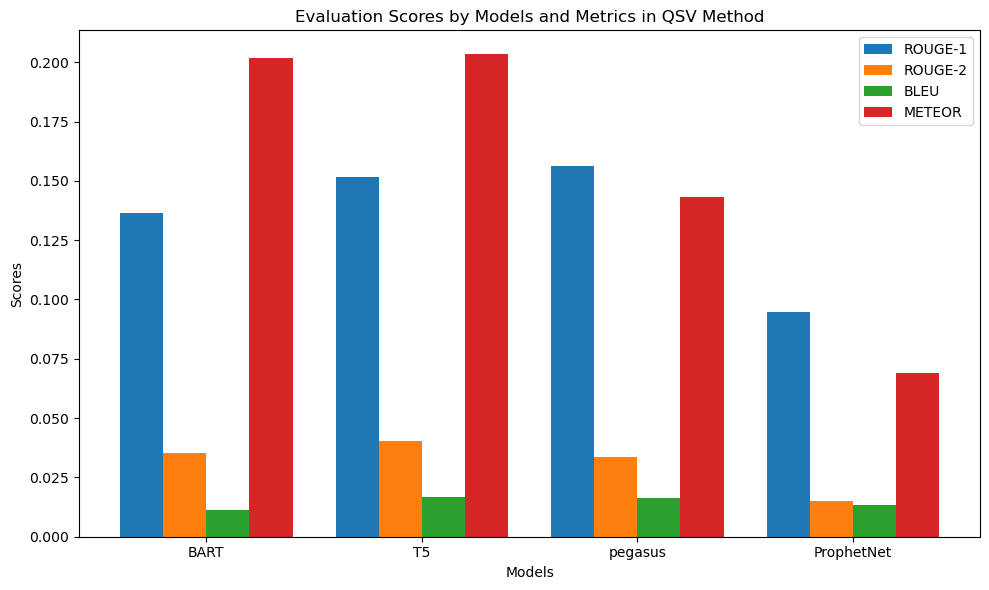

In [8]:
import matplotlib.pyplot as plt


metrics = ["ROUGE-1", "ROUGE-2", "BLEU", "METEOR"]

results = {metric: [] for metric in metrics}

for model in models:
    for metric in metrics:
        results[metric].append(evaluation_results_qsv[model][metric])

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.bar(x + i * width - width * (len(metrics) - 1) / 2, results[metric], width, label=metric)

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Evaluation Scores by Models and Metrics in QSV Method')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()


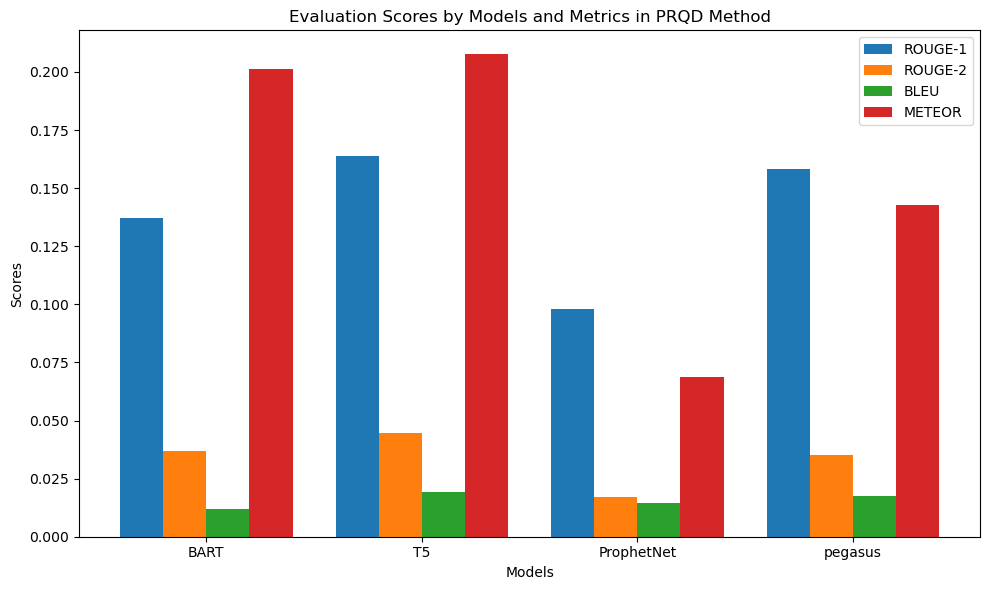

In [ ]:
metrics = ["ROUGE-1", "ROUGE-2", "BLEU", "METEOR"]

results = {metric: [] for metric in metrics}

for model in models:
    for metric in metrics:
        results[metric].append(evaluation_results_pqrd[model][metric])

x = np.arange(len(models)) 
width = 0.2 

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.bar(x + i * width - width * (len(metrics) - 1) / 2, results[metric], width, label=metric)

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Evaluation Scores by Models and Metrics in PRQD Method')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
plt.tight_layout()
plt.show()


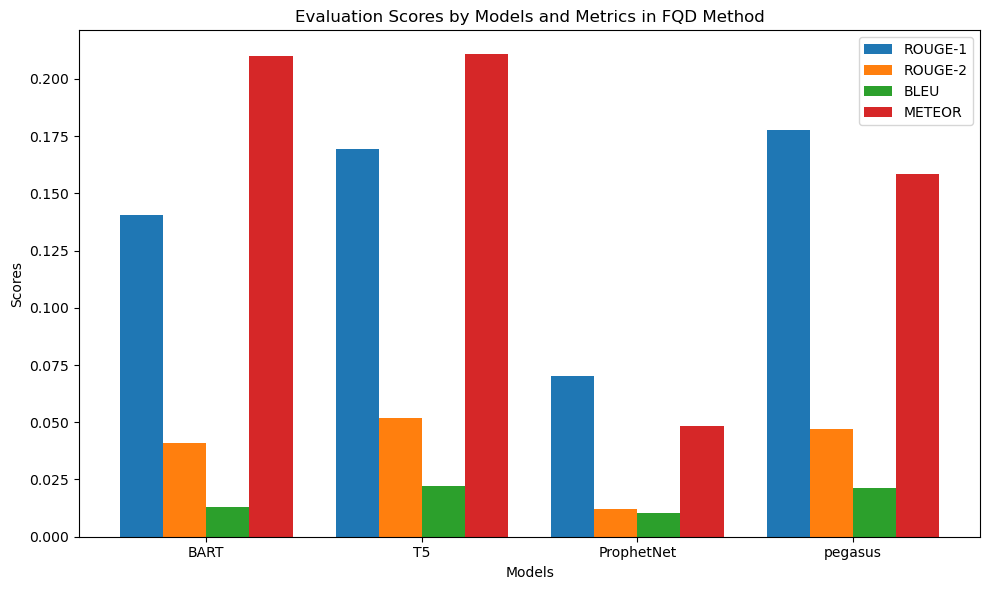

In [ ]:
metrics = ["ROUGE-1", "ROUGE-2", "BLEU", "METEOR"]

results = {metric: [] for metric in metrics}

for model in models:
    for metric in metrics:
        results[metric].append(evaluation_results_fqd[model][metric])

x = np.arange(len(models)) 
width = 0.2 

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.bar(x + i * width - width * (len(metrics) - 1) / 2, results[metric], width, label=metric)

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Evaluation Scores by Models and Metrics in FQD Method')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
plt.tight_layout()
plt.show()


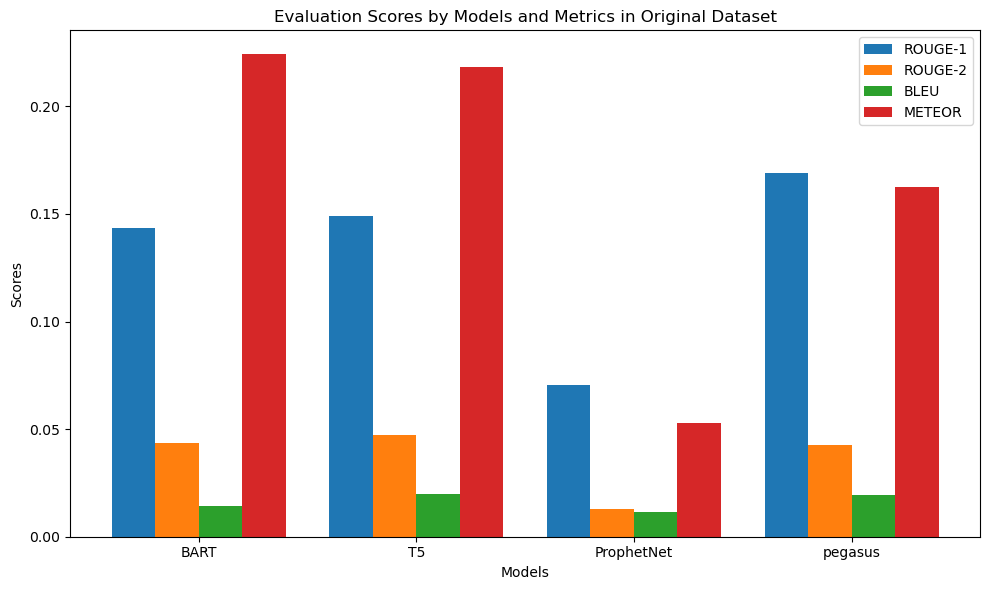

In [ ]:
metrics = ["ROUGE-1", "ROUGE-2", "BLEU", "METEOR"]

results = {metric: [] for metric in metrics}

for model in models:
    for metric in metrics:
        results[metric].append(evaluation_results_og[model][metric])

x = np.arange(len(models))  
width = 0.2  

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.bar(x + i * width - width * (len(metrics) - 1) / 2, results[metric], width, label=metric)

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Evaluation Scores by Models and Metrics in Original Dataset')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
plt.tight_layout()
plt.show()


Here since the results are not that great I wanted to try to see if instead of putting the human summary as my refrence, i put the Question itself as my reference will it make the scores better? 

Spoiler Alert: It really does :)

In [ ]:
df = pd.read_csv('edited_dataframe.csv')
df_fqd1 = pd.read_csv('edited_dataframe_fqd.csv')
df_pqrd1 = pd.read_csv('edited_dataframe_prqd.csv')

In [ ]:
df.shape, df_fqd1.shape, df_pqrd1.shape

((1000, 23), (2258, 2), (3146, 2))

In [ ]:
evaluation_results_og = {}
evaluation_results_fqd = {}
evaluation_results_pqrd = {}

models = ["BART", "T5", "ProphetNet", "pegasus"]

for model_name in models:
    print(f"evaluating {model_name}:")

    rouge1_scores, rouge2_scores = [], []
    bleu_scores, meteor_scores = [], []

    for ref, gen in zip(df["CHQ"], df_og[f"Pred_Summaries_{model_name}"]):
        if pd.isna(gen):
            continue

        r1, r2 = rouge(ref, gen)
        rouge1_scores.append(r1)
        rouge2_scores.append(r2)

        bleu_scores.append(bleu(ref, gen))
        meteor_scores.append(meteor(ref, gen))

    evaluation_results_og[model_name] = {
        "ROUGE-1": np.mean(rouge1_scores),
        "ROUGE-2": np.mean(rouge2_scores),
        "BLEU": np.mean(bleu_scores),
        "METEOR": np.mean(meteor_scores),
    }

    rouge1_scores, rouge2_scores = [], []
    bleu_scores, meteor_scores = [], []

    for ref, gen in zip(df_fqd1["CHQ"], df_fqd[f"Pred_Summaries_{model_name}"]):
        if pd.isna(gen):
            continue

        r1, r2 = rouge(ref, gen)
        rouge1_scores.append(r1)
        rouge2_scores.append(r2)

        bleu_scores.append(bleu(ref, gen))
        meteor_scores.append(meteor(ref, gen))

    evaluation_results_fqd[model_name] = {
        "ROUGE-1": np.mean(rouge1_scores),
        "ROUGE-2": np.mean(rouge2_scores),
        "BLEU": np.mean(bleu_scores),
        "METEOR": np.mean(meteor_scores),
    }

    rouge1_scores, rouge2_scores = [], []
    bleu_scores, meteor_scores = [], []

    for ref, gen in zip(df_pqrd1["CHQ"], df_pqrd[f"Pred_Summaries_{model_name}"]):
        if pd.isna(gen):
            continue

        r1, r2 = rouge(ref, gen)
        rouge1_scores.append(r1)
        rouge2_scores.append(r2)

        bleu_scores.append(bleu(ref, gen))
        meteor_scores.append(meteor(ref, gen))

    evaluation_results_pqrd[model_name] = {
        "ROUGE-1": np.mean(rouge1_scores),
        "ROUGE-2": np.mean(rouge2_scores),
        "BLEU": np.mean(bleu_scores),
        "METEOR": np.mean(meteor_scores),
    }


evaluating BART:
evaluating T5:
evaluating ProphetNet:
evaluating pegasus:


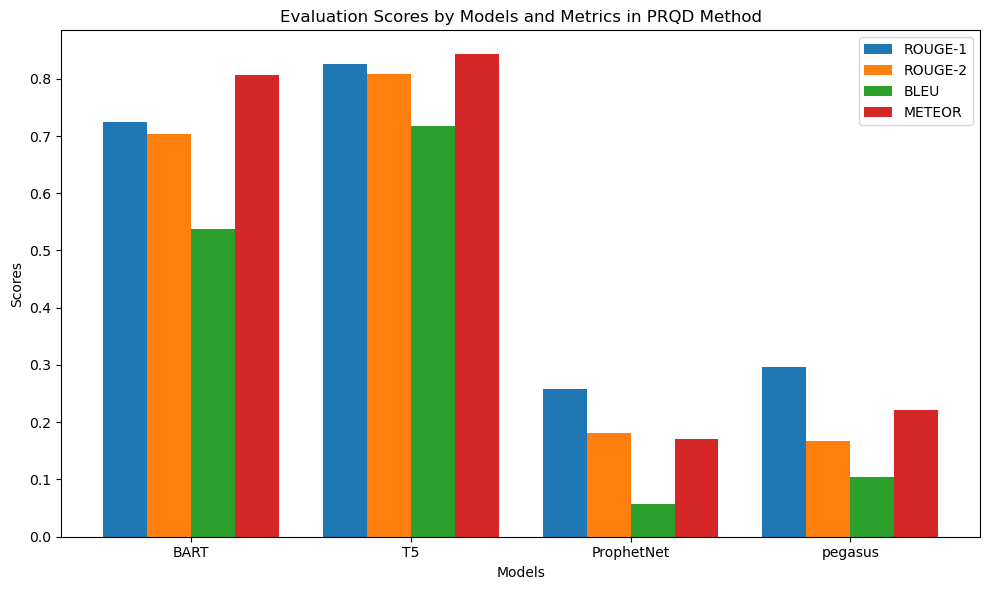

In [12]:
metrics = ["ROUGE-1", "ROUGE-2", "BLEU", "METEOR"]

results = {metric: [] for metric in metrics}

for model in models:
    for metric in metrics:
        results[metric].append(evaluation_results_pqrd[model][metric])

x = np.arange(len(models))  
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.bar(x + i * width - width * (len(metrics) - 1) / 2, results[metric], width, label=metric)

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Evaluation Scores by Models and Metrics in PRQD Method')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
plt.tight_layout()
plt.show()


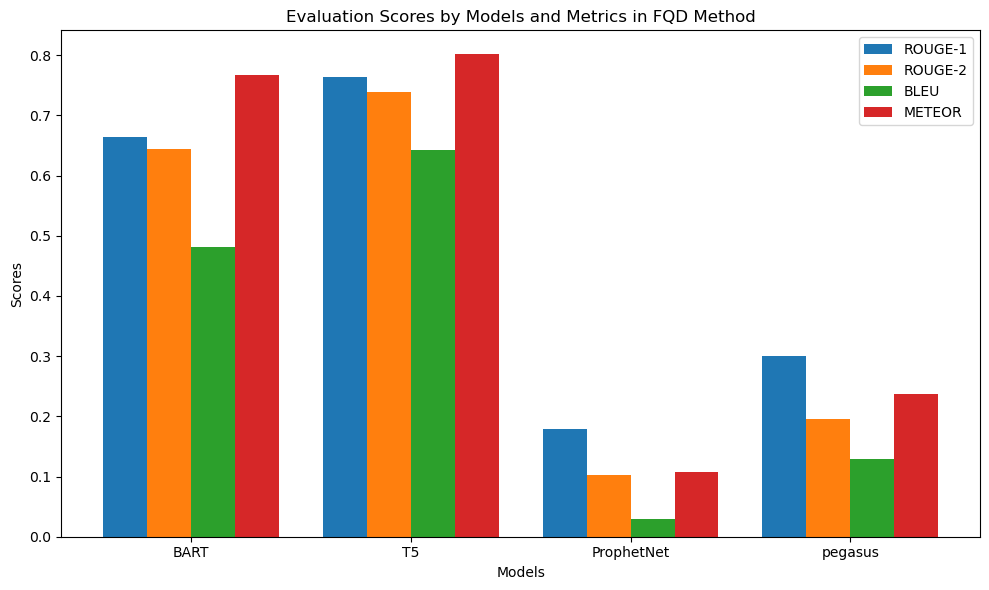

In [ ]:
metrics = ["ROUGE-1", "ROUGE-2", "BLEU", "METEOR"]

results = {metric: [] for metric in metrics}

for model in models:
    for metric in metrics:
        results[metric].append(evaluation_results_fqd[model][metric])

x = np.arange(len(models))  
width = 0.2  

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.bar(x + i * width - width * (len(metrics) - 1) / 2, results[metric], width, label=metric)

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Evaluation Scores by Models and Metrics in FQD Method')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
plt.tight_layout()
plt.show()


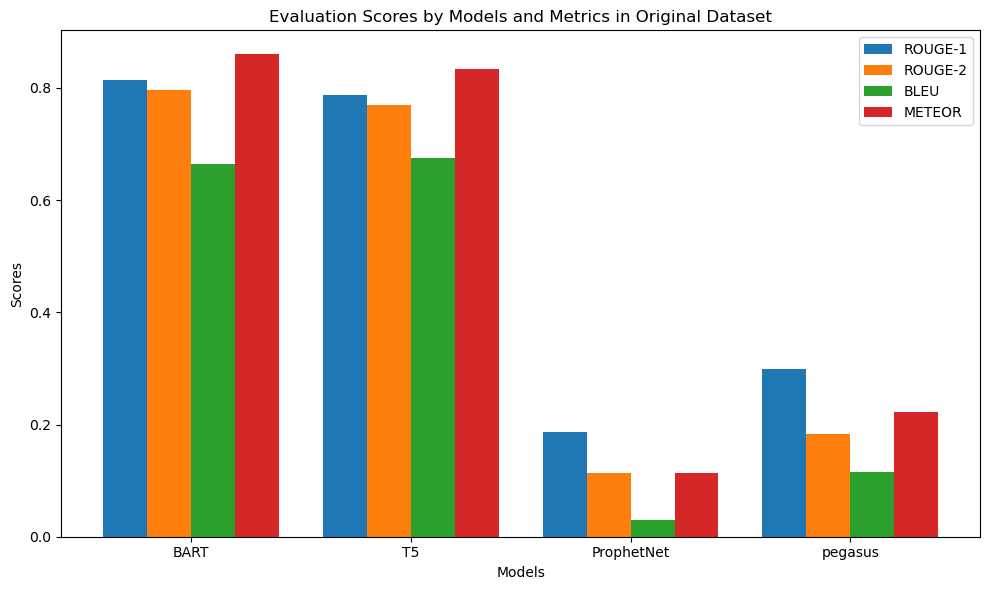

In [ ]:
metrics = ["ROUGE-1", "ROUGE-2", "BLEU", "METEOR"]

results = {metric: [] for metric in metrics}

for model in models:
    for metric in metrics:
        results[metric].append(evaluation_results_og[model][metric])

x = np.arange(len(models)) 
width = 0.2 

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.bar(x + i * width - width * (len(metrics) - 1) / 2, results[metric], width, label=metric)

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Evaluation Scores by Models and Metrics in Original Dataset')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
plt.tight_layout()
plt.show()


**Comparing the results:**

    Firstly the models tend to summarize the questions we gave them and it's different from the human summary so as expected the scores are much higher when comparing with questions rather than the human summary.

    Secondly the best performing model I would pick T5 which is closer to the human summary and it's score is higher than the other models in that regrad, but the order would be: T5, BART, Pegasus and then ProphetNet.

    Thirdly the best method in order is: FQD, PRQD, QSV.

    Weirdly the original dataset performed if not better as well as the other methods!

    please note that some of these models are not meant to be used for summarization without any fine-tuning, so the results may not be a good representation of the performance of the model in general!